In [1]:
import ect
from ect.optimizers import ECTAntialiasOptimizer
import matplotlib.pyplot as plt
import numpy as np
import cv2

radius = 200
img_offset = radius/20
ect_offset = radius/10

n_knots = 10

def rms(x: np.ndarray) -> float:
    rms_ = np.sqrt((x*np.conj(x)).sum().sum())
    return rms_

def rmsnorm(x: np.ndarray) -> np.ndarray:
    rms = np.sqrt((x*np.conj(x)).sum().sum())
    return np.abs(x)/rms

def snr(image: cv2.Mat, template: cv2.Mat):
    snr_lin = (1/rms((rmsnorm(image) - rmsnorm(template))))
    return 20*np.log10(snr_lin)

opt = ECTAntialiasOptimizer(
    image_path = "../sample_imgs/ruler.png",
    radius = radius,
    img_offset = img_offset,
    ect_offset = ect_offset,
    loss_fcn = lambda x, y: -snr(x, y)
)

## Show the shape of loss function

In [2]:
# ect_aas = np.linspace(1.2, 1.8, 10)
# iect_aas = np.linspace(1.2, 1.8, 10)

# # loss_fn = lambda x: opt.loss([1.50, x])

# ect_aas_, iect_aas_ = np.meshgrid(ect_aas, iect_aas)

# losses = np.zeros_like(ect_aas_)

# for x, e_aa in enumerate(ect_aas):
#     for y, ie_aa in enumerate(iect_aas):

#         losses[x, y] = opt.loss([e_aa, ie_aa])

# # losses = np.array(list(map(loss_fn, ect_aas)))

In [3]:
# from matplotlib import cm
# plt.figure(figsize=(10, 10))
# ax = plt.subplot(projection = "3d")
# ax.plot_surface(ect_aas_[::-1, :], iect_aas_, losses[::-1, :], cmap=cm.coolwarm)

In [4]:
result = opt.optim()

# solution = result['x'][0]


Current loss=-21.887
Current loss=-21.900
Current loss=-21.919
Current loss=-21.922
Current loss=-21.948
Current loss=-21.985
Current loss=-22.051
Current loss=-22.137
Current loss=-22.147
Current loss=-22.149
Current loss=-22.149
Current loss=-22.149
Current loss=-22.149
Current loss=-22.149
Current loss=-22.149
Current loss=-22.149


In [5]:
result

      fun: -22.149334882547322
 hess_inv: array([[ 1.49509538e-04,  1.27747706e-05, -1.14520792e-04,
        -8.97299737e-06,  6.59795217e-04, -8.50063156e-04],
       [ 1.27747706e-05,  6.22386661e-04, -1.08703914e-05,
        -3.85926260e-04,  1.37521776e-04, -2.58048980e-04],
       [-1.14520792e-04, -1.08703914e-05,  2.05623984e-04,
         1.22090313e-05, -8.80785113e-04,  2.87099057e-04],
       [-8.97299737e-06, -3.85926260e-04,  1.22090313e-05,
         9.18626755e-04, -3.07218913e-04, -1.86401589e-04],
       [ 6.59795217e-04,  1.37521776e-04, -8.80785113e-04,
        -3.07218913e-04,  2.08531639e-02, -1.40084394e-03],
       [-8.50063156e-04, -2.58048980e-04,  2.87099057e-04,
        -1.86401589e-04, -1.40084394e-03,  3.16280392e-02]])
      jac: array([-2.38418579e-07, -4.76837158e-07,  0.00000000e+00, -7.15255737e-07,
       -7.15255737e-07, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 161
      nit: 16
     njev: 23
   status: 0
  succes

opt.loss(solution)=-22.149334882547322


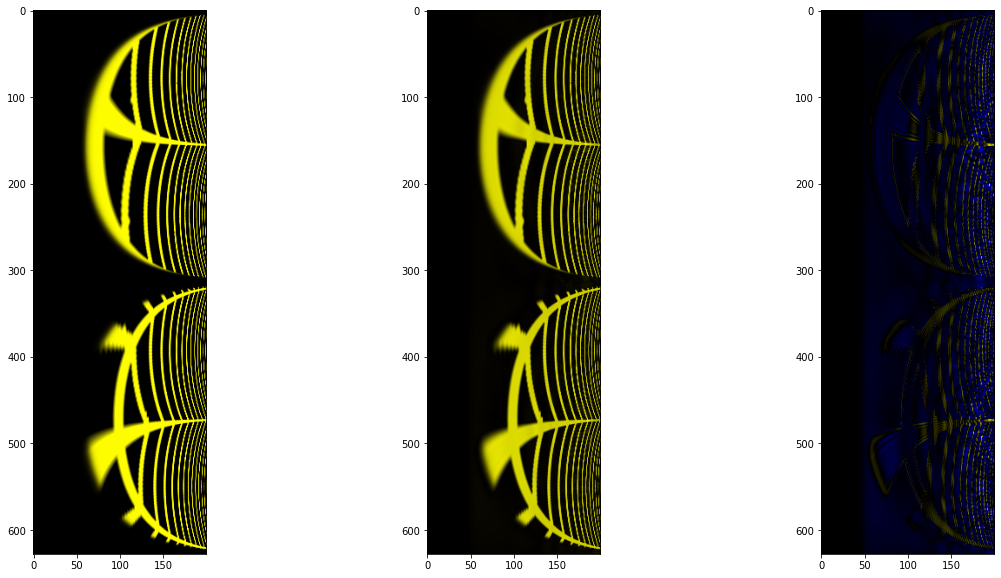

In [6]:
solution = result['x']

opt.show_result(rmsnorm)

print(f"{opt.loss(solution)=}")
# print(f"{opt.loss_sidelobe(solution)=}")

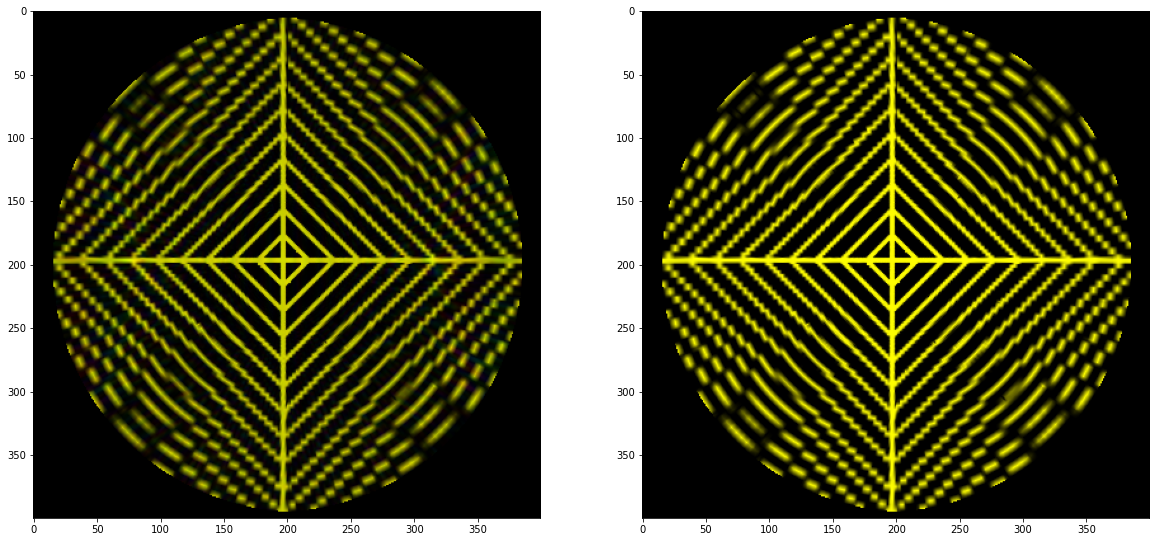

In [7]:
inv_img = ect.ilogpolar(ect.complex_to_hsv(opt.inv), radius=radius, offset=img_offset)
src_img = ect.ilogpolar(ect.complex_to_hsv(opt.image), radius=radius, offset=img_offset)

plt.figure(figsize=(20,10))

plt.subplot(1, 2, 1)
plt.imshow(inv_img)

plt.subplot(1, 2, 2)
plt.imshow(src_img)